# 5. Geometric transformation - 기하학적 변환

## 1) Image translation transformation and Shear transformation - 영상의 이동 변환과 전단 변환

<hr>

### Translation transformation - 이동 변환
<hr>

- 영상의 기하학적 변환(geometric transformation)이란
    - 영상을 구성하는 픽셀의 배치 구조를 변경함으로써 전체 영상의 모양을 비꾸는 작업이다.
    - image registration, removal of geometric distortion, etc.
<hr>

- 이동 변환(Translation transformation)
    - 가로 또는 세로 방향으로 영삳을 특정 크기만큼 이동시키는 변환
    - x축과 y축 방향으로의 이동 변위를 지정한다.
<hr>

> `영상의 어파인 변환 함수`
$$\mathsf{{\color{RoyalBlue}cv2.}{\color{Tan}warpAffine}(src, M, dsize, dst={\color{green}None}, flags, borderMode, borderValue) -> dst}$$
- src : source. 입력 영상
- M : Matrix. `2x3 어파인 변환 행렬. 실수형(float32 or 64)`
- dsize : destination size. 결과 영상 크기. (w, h) 튜플. `(0, 0)`이면 src와 같은 크기로 설정.
- dst : destination. 출력 영상
- flags : 보간법. 기본값은 cv2.INTER_LINEAR
- borderMode : 가장자리 픽셀 확장 방식. 기본값은 cv2.BORDER_CONSTANT(0으로 확장)
- borderValue : cv2.BORDER_CONSTANT일 때 사용할 상수 값. 기본값은 0

In [ ]:
import cv2
help(cv2.warpAffine)

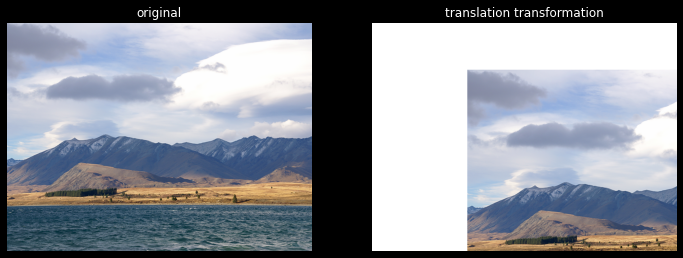

In [39]:
### Example the translation transformation of image - 이동 변환 예제
import cv2
import matplotlib.pyplot as plt
import numpy as np

source = cv2.imread("./images/tekapo.bmp")

affine_matrix = np.array([[1, 0, 200], [0, 1, 100]], dtype=np.float32)

destination = cv2.warpAffine(source, affine_matrix, (0, 0), borderValue=(255, 255, 255))

## pyplot으로 출력
plt.figure(figsize=(12, 6))

plt.subplot(121, title="original").axis("off")
plt.imshow(source[:, :, ::-1])

plt.subplot(122, title="translation transformation").axis("off")
plt.imshow(destination[:, :, ::-1])

plt.show()

## OpenCV 가상 윈도우로 출력
cv2.imshow("original", source)
cv2.imshow("translation transformation", destination)

cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

<hr>

### Shear Transformation - 전단 변환
<hr>

- 층 밀림 변환. x축과 y축 방향에 대해 따로 정의한다.
    - (e.g.) x축 방향으로 0.5를 지정하면 y축 길이의 반 만큼 x축 방향으로 점진적으로 밀린다.<br>
반대의 경우 또한 같다. y축 방향으로 0.5를 지정하면 x축 길이의 반 만큼 y축 방향으로 점진적으로 밀린다.
<hr>

- 전단 변환 수식
$$\text{x축 방향 = }\begin{cases}x\prime = x + {\color{RoyalBlue}m}y \\ y\prime = y\end{cases}
\begin{bmatrix}x\prime \\ y\prime\end{bmatrix} = \begin{bmatrix}1 & {\color{RoyalBlue}m} & 0 \\ 0 & 1 & 0\end{bmatrix}
\begin{bmatrix}x \\ y \\ 1\end{bmatrix}$$
$$\text{y축 방향 = }\begin{cases}x\prime = x \\ y\prime = {\color{RoyalBlue}m}x + y\end{cases}
\begin{bmatrix}x\prime \\ y\prime\end{bmatrix} = \begin{bmatrix}1 & 0 & 0 \\ {\color{RoyalBlue}m} & 1 & 0\end{bmatrix}
\begin{bmatrix}x \\ y \\ 1\end{bmatrix}$$

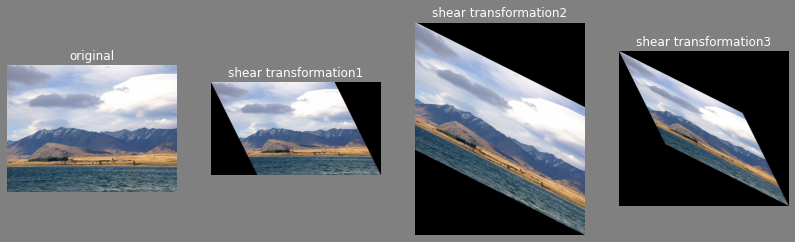

In [8]:
### Example the shear transformation of image - 전단 변환 예제
import cv2
import matplotlib.pyplot as plt
import numpy as np

source = cv2.imread("./images/tekapo.bmp")

height, width = source.shape[:2]

affine_matrix = np.array([[1, 0.5, 0], [0, 1, 0]], dtype=np.float32)
affine_matrix2 = np.array([[1, 0, 0], [0.5, 1, 0]], dtype=np.float32)
affine_matrix3 = np.array([[1, 0.5, 0], [0.5, 1, 0]], dtype=np.float32)

destination = cv2.warpAffine(source, affine_matrix, (width + int(height * 0.5), height))
destination2 = cv2.warpAffine(source, affine_matrix2, (width, height + int(width * 0.5)))
destination3 = cv2.warpAffine(source, affine_matrix3, (width + int(height * 0.5), height + int(width * 0.5)))

## pyplot으로 출력
plt.figure(figsize=(14, 6), facecolor="gray")

plt.subplot(141, title="original").axis("off")
plt.imshow(source[:, :, ::-1])

plt.subplot(142, title="shear transformation1").axis("off")
plt.imshow(destination[:, :, ::-1])

plt.subplot(143, title="shear transformation2").axis("off")
plt.imshow(destination2[:, :, ::-1])

plt.subplot(144, title="shear transformation3").axis("off")
plt.imshow(destination3[:, :, ::-1])

plt.show()

## OpenCV 가상 윈도우로 출력
cv2.imshow("original", source)
cv2.imshow("shear transformation1", destination)
cv2.imshow("shear transformation2", destination2)
cv2.imshow("shear transformation3", destination3)

cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

## 2) Image magnification and Redution - 영상의 확대와 축소

<hr>

### Scale transformation - 크기 변환
<hr>

- 영상의 크기를 원본 영상보다 크게 또는 작게 만드는 변환
- x축과 y축 방향으로의 스케일 비율(scale factor)를 지정한다.
- 참고사항
$$\text{affine\ matrix} = \begin{bmatrix}S_x & m & a \\ m & S_y & b\end{bmatrix}$$
$$\scriptstyle{S_x,\ S_y\ =\ x축,\ y축\ 스케일\ 비율 / m\ =\ 층\ 밀림\ 정도 / a,\ b\ =\ x축,\ y축\ 이동\ 변위}$$
<hr>

> `영상의 크기 변환 함수`
$$\mathsf{{\color{RoyalBlue}cv2.}{\color{Tan}resize}(src, dsize, dst={\color{green}None}, fx, fy, interpolation) -> dst}$$
- src : source. 입력 영상
- dsize : destination size. 결과 영상 크기. (w, h) 튜플 형식. `(0, 0)이면 fx와 fy 값을 이용하여 결정`한다.(권장사항)
- dst : destination. 출력 영상
- fx, fy : x와 y방향의 스케일 비율(scale factor). (dsize 값이 0일 때 유효하다.)
- interpolation : 보간법 지정. 기본값은 cv2.INTER_LINEAR

||||
|:--|:--|:--|
|cv2.INTER_NEAREST|최근방 이웃 보간법|속도는 가장 빠르지만 결과 영상의 퀄리티가 안좋다.|
|cv2.INTER_LINEAR|양선형 보간법(2x2 범위 내 이웃의 픽셀을 참조함)|어느 정도의 퀄리티와 속도가 빠르다.|
|cv2.INTER_CUBIC|3차회선 보간법(4x4 범위 내 이웃의 픽셀을 참조함)|LINEAR보다 퀄리티가 좋고, 속도는 더 느리다.|
|cv2.INTER_LANCZOS4|Lanczos 보간법(8x8 범위 내 이웃의 픽셀을 참조함)|CUBIC보다 퀄리티가 좋고, 속도가 제일 느리다.|
|cv2.INTER_AREA|영상 축소 시 효과적||
<hr>

- 영상의 축소 시 고려할 사항
    - 영상 축소 시 디테일이 사라지는 경우가 발생한다.(e.g. 한 픽셀로 구성된 선분)
    - 입력 영상을 부드럽게 필터링한 후 축소 혹은 다단계 축소
    - OpenCV의 cv2.resize() 함수에서는 cv2.INTER_AREA 플래그를 사용하면 된다.

In [ ]:
import cv2
help(cv2.resize)

In [22]:
### Example the scale transformation of image - 영상의 크기 변환 예제
import cv2
import matplotlib.pyplot as plt

source = cv2.imread("./images/rose.bmp")

destination1 = cv2.resize(source, (0, 0), fx=4, fy=4, interpolation=cv2.INTER_NEAREST)
destination2 = cv2.resize(source, (1920, 1280))  # 기본값인 cv2.INTER_LINEAR가 적용됨
destination3 = cv2.resize(source, (1920, 1280), interpolation=cv2.INTER_CUBIC)
destination4 = cv2.resize(source, (1920, 1280), interpolation=cv2.INTER_LANCZOS4)

## OpenCV 가상 윈도우로 출력
cv2.imshow("source", source)
cv2.imshow("destination1", destination1[500:900, 400:800])
cv2.imshow("destination2", destination2[500:900, 400:800])
cv2.imshow("destination3", destination3[500:900, 400:800])
cv2.imshow("destination4", destination4[500:900, 400:800])

cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

<hr>

### Symmetry transformation of image(flip, reflection) - 영상의 대칭 변환(우대칭, 기대칭)
<hr>

> `영상의 대칭 변환 함수`
$$\mathsf{{\color{RoyalBlue}cv2.}{\color{Tan}flip}(src, flipCode, dst={\color{green}None}) -> dst}$$
- src : source. 입력 영상
- flipCode : 대칭 방향 지정
    - +1 : 좌우 대칭(선대칭)
    - 0 : 상하 대칭(선대칭)
    - -1 : 좌우 & 상하 대칭(점대칭)
- dst : destination. 출력 영상

In [ ]:
import cv2
help(cv2.flip)

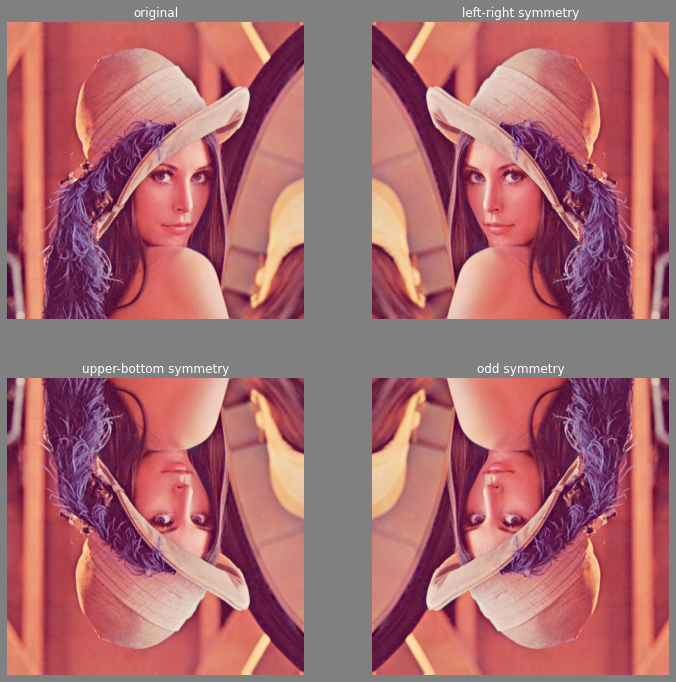

In [15]:
### Example the symmetry trnasformation of image - 영상의 대칭 변환 예제
import cv2
import matplotlib.pyplot as plt

source = cv2.imread("./images/lenna.bmp")

flip1 = cv2.flip(source, 1)
flip2 = cv2.flip(source, 0)
odd_symmetry = cv2.flip(source, -1)

## pyplot으로 출력
plt.figure(figsize=(12, 12), facecolor="gray")

plt.subplot(221, title="original").axis("off")
plt.imshow(source[:, :, ::-1])

plt.subplot(222, title="left-right symmetry").axis("off")
plt.imshow(flip1[:, :, ::-1])

plt.subplot(223, title="upper-bottom symmetry").axis("off")
plt.imshow(flip2[:, :, ::-1])

plt.subplot(224, title="odd symmetry").axis("off")
plt.imshow(odd_symmetry[:, :, ::-1])

plt.show()

## OpenCV 가상 윈도우로 출력
cv2.imshow("source", source)
cv2.imshow("left-right symmetry", flip1)
cv2.imshow("upper-bottom symmetry", flip2)
cv2.imshow("odd symmetry", odd_symmetry)

cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

## 3) Image pyramid - 이미지 피라미드

<hr>

- 하나의 영상에 대해 다양한 해상도의 영상 세트를 구성한 것
- 보통 가우시안 블러링 & 다운샘플링 형태로 축소하여 구성한다.
<hr>

> `영상 피라미드 다운샘플링 함수`
$$\mathsf{{\color{RoyalBlue}cv2.}{\color{Tan}pyrDown}(src, dst={\color{green}None}, dstsize, borderType) -> dst}$$
- src : source. 입력 영상
- dst : destination. 출력 영상
- dstsize : destination size. 출력 영상 크기<br>
따로 지정하지 않으면 입력 영상의 가로, 세로 크기의 1/2로 설정한다.
- borderType : 가장자리 픽셀 확장 방식
- 참고사항
    - 먼저 5x5 크기의 가우시안 필터를 적용한다.
    - 이후 짝수 행과 열을 제거하여 작은 크기의 영상을 생성한다.
<hr>

> `영상 피라미드 업샘플링 함수`
$$\mathsf{{\color{RoyalBlue}cv2.}{\color{Tan}pyrUp}(src, dst={\color{green}None}, dstsize, borderType) -> dst}$$
- src : source. 입력 영상
- dst : destination. 출력 영상
- dstsize : destination size. 출력 영상 크기<br>
따로 지정하지 않으면 입력 영상의 가로, 세로 크기의 2배로 설정한다.
- borderType : 가장자리 픽셀 확장 방식

In [ ]:
import cv2
help(cv2.pyrDown)

In [ ]:
import cv2
help(cv2.pyrUp)

In [33]:
### Example a drawing rectangle in pyramid image 1 - 피라미드 영상에 사각형 그리기 예제 1
import cv2
import matplotlib.pyplot as plt

source = cv2.imread("./images/cat.bmp")

source_copy = source.copy()

rectangle_size = (250, 120, 200, 200)  # Tuple of rectangle size (x, y, w, h)
cv2.rectangle(source_copy, rectangle_size, (0, 0, 255), 2)

## OpenCv 가상 윈도우로 출력
cv2.imshow("source", source_copy)
cv2.waitKey()

for shift_ in range(1, 4):
    source = cv2.pyrDown(source)
    source_copy = source.copy()
    rectangle = cv2.rectangle(source_copy, rectangle_size, (0, 0, 255), 2, shift=shift_)
    cv2.imshow("source", source_copy)
    cv2.waitKey()

cv2.destroyAllWindows()
cv2.waitKey(1)

-1

## 4) Image rotation - 영상의 회전

<hr>

### rotation transformation - 회전 변환
<hr>

- 영상을 특정 각도만큼 회전시키는 변환(반시계 방향)
<hr>

- 회전 변환 수식
$$\begin{cases}x\prime = \cos\theta\cdot x + \sin\theta\cdot y \\ 
x\prime = -\sin\theta\cdot x + \cos\theta\cdot y\end{cases}$$
$$\begin{bmatrix}x\prime \\ y\prime\end{bmatrix} = 
\begin{bmatrix}\cos\theta & \sin\theta & 0 \\ -\sin\theta & \cos\theta & 0\end{bmatrix}
\begin{bmatrix}x \\ y \\ 1\end{bmatrix}$$

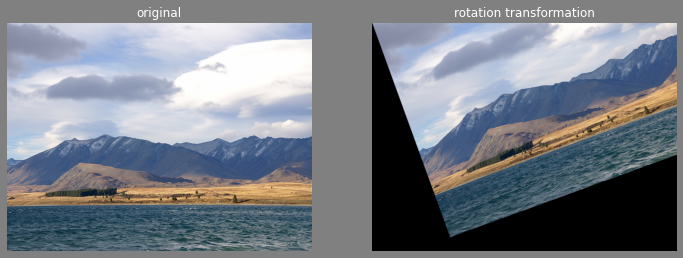

In [40]:
### Example a rotation of image - 영상의 회전 에제
import math

import cv2
import matplotlib.pyplot as plt
import numpy as np

source = cv2.imread("./images/tekapo.bmp")

radius = 20 * math.pi / 180

affine_matrix = np.array([[math.cos(radius), math.sin(radius), 0],
                         [-math.sin(radius), math.cos(radius), 0]], dtype=np.float32)

destination = cv2.warpAffine(source, affine_matrix, (0, 0))

## pyplot으로 출력
plt.figure(figsize=(12, 6), facecolor="gray")

plt.subplot(121, title="original").axis("off")
plt.imshow(source[:, :, ::-1])

plt.subplot(122, title="rotation transformation").axis("off")
plt.imshow(destination[:, :, ::-1])

plt.show()

## OpenCV 가상 윈도우로 출력
cv2.imshow("source", source)
cv2.imshow("rotation transformation", destination)

cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

<hr>

### Compute rotation transformation matrix of image - 영상의 회전 변환 행렬 구하기
<hr>
> `영상의 회전 변환 행렬 구하기 함수`

$$\mathsf{{\color{RoyalBlue}cv2.}{\color{Tan}getRotationMatrix2D}(center, angle, scale) -> retval}$$
- center : 회전 중심 좌표. (x, y) 튜플 형식으로 전달한다.
- angle : 반시계 방향 기준으로 회전 각도(degree). 음수는 시계 방향이다.
- scale : 추가적인 확대 비율을 지정할 수 있다.
- retval : return value. `2x3 어파인 변환 행렬. 실수형으로 반환한다.`

$$\begin{bmatrix}\alpha & \beta & (1 - \alpha)\cdot \text{center.x} - \beta\cdot \text{center.y} \\ 
-\beta & \alpha & \beta\cdot \text{center.x} + (1 - \alpha)\cdot \text{center.y}\end{bmatrix} \text{where}
\begin{cases}\alpha = \text{scale}\cdot\cos(\text{angle}) \\ \beta = \text{scale}\cdot\sin(\text{angle})\end{cases}$$

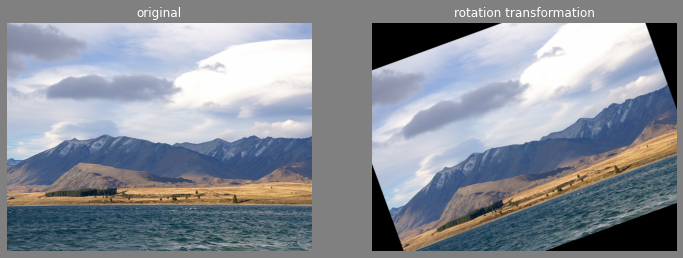

-1

In [42]:
### Example a image rotation from the center - 영상의 중앙 기준 회전 예제
import cv2
import matplotlib.pyplot as plt

source = cv2.imread("./images/tekapo.bmp")

width = source.shape[1]
height = source.shape[0]
conter_points = (width / 2, height / 2)

rotation_matrix = cv2.getRotationMatrix2D(conter_points, 20, 1)

destination = cv2.warpAffine(source, rotation_matrix, (0, 0))

## pyplot으로 출력
plt.figure(figsize=(12, 6), facecolor="gray")

plt.subplot(121, title="original").axis("off")
plt.imshow(source[:, :, ::-1])

plt.subplot(122, title="rotation transformation").axis("off")
plt.imshow(destination[:, :, ::-1])

plt.show()

## OpenCV 가상 윈도우로 출력
cv2.imshow("source", source)
cv2.imshow("rotation transformation", destination)

cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)